<a href="https://colab.research.google.com/github/WolfgangHou/Wine-Quality-Analysis/blob/main/Wine_dataset_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_wine_quality_dataset_path = kagglehub.dataset_download('yasserh/wine-quality-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/WineQT.csv


# Objective

Using and analyzing wine dataset to know how wine quality is affected.

# Load wine dataset

In [ ]:
df = pd.read_csv('/kaggle/input/WineQT.csv')

# Basic data exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# check the data in several ways
print(
df.info(),
df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None fixed acidity           0
volatile acidity        0
citric acid       

In [ ]:
print(
    df.describe(),
    df.head)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

# Detect outliers


## Detect outliers by z-score

In [ ]:
from scipy.stats import zscore
# detect outliers by z-score

# prevent to removed data because of imblanced label
z_scores = np.abs(zscore(df.drop('quality',axis=1)))

# setting threshold out outliers as 3 stdev
threshold = 3

# detact and calculate amount and ratio of each column
outlier_counts = (z_scores > threshold).sum(axis=0)
outlier_ratios = outlier_counts / len(df) * 100

# make it into DataFrame
outliers_df = pd.DataFrame({
    'Outlier Count': outlier_counts,
    'Outlier Ratio (%)': outlier_ratios
})

print(outliers_df)

                      Outlier Count  Outlier Ratio (%)
fixed acidity                     9           0.787402
volatile acidity                  5           0.437445
citric acid                       1           0.087489
residual sugar                   23           2.012248
chlorides                        21           1.837270
free sulfur dioxide              13           1.137358
total sulfur dioxide             10           0.874891
density                          12           1.049869
pH                                5           0.437445
sulphates                        21           1.837270
alcohol                           7           0.612423
Id                                0           0.000000


# Data cleaning

In [ ]:
# remove outliers for dataset and Id column to prevent interference
# due to high usability of original dataset, there's no need for further cleanning process for now
df_zs = df[(z_scores <= 3).all(axis=1)].drop('Id',axis=1)
df_zs.shape

(1046, 12)

# Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Feature distribution

<Figure size 800x600 with 0 Axes>

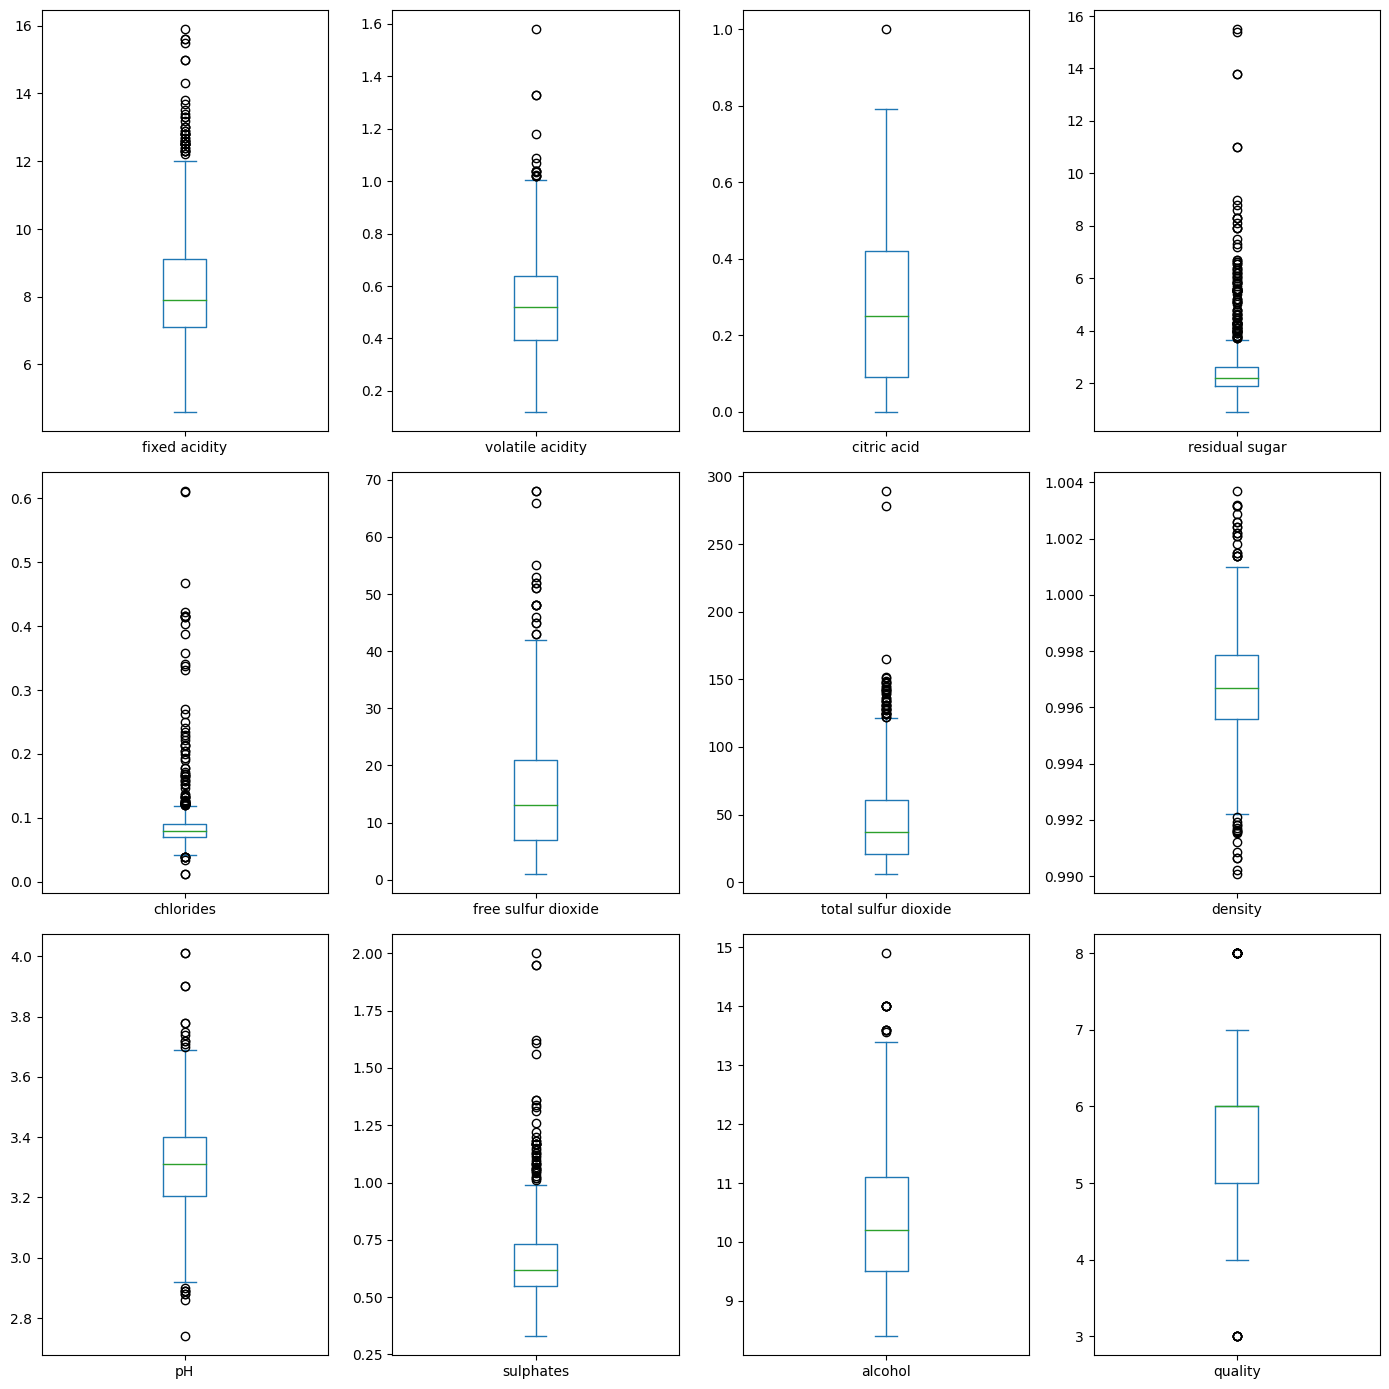

In [ ]:
# check each features distribution by box plot
plt.figure(figsize=(8, 6))
dfc.plot(kind='box',subplots=True, layout=(-1,4), figsize=(14,14))
plt.tight_layout()

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

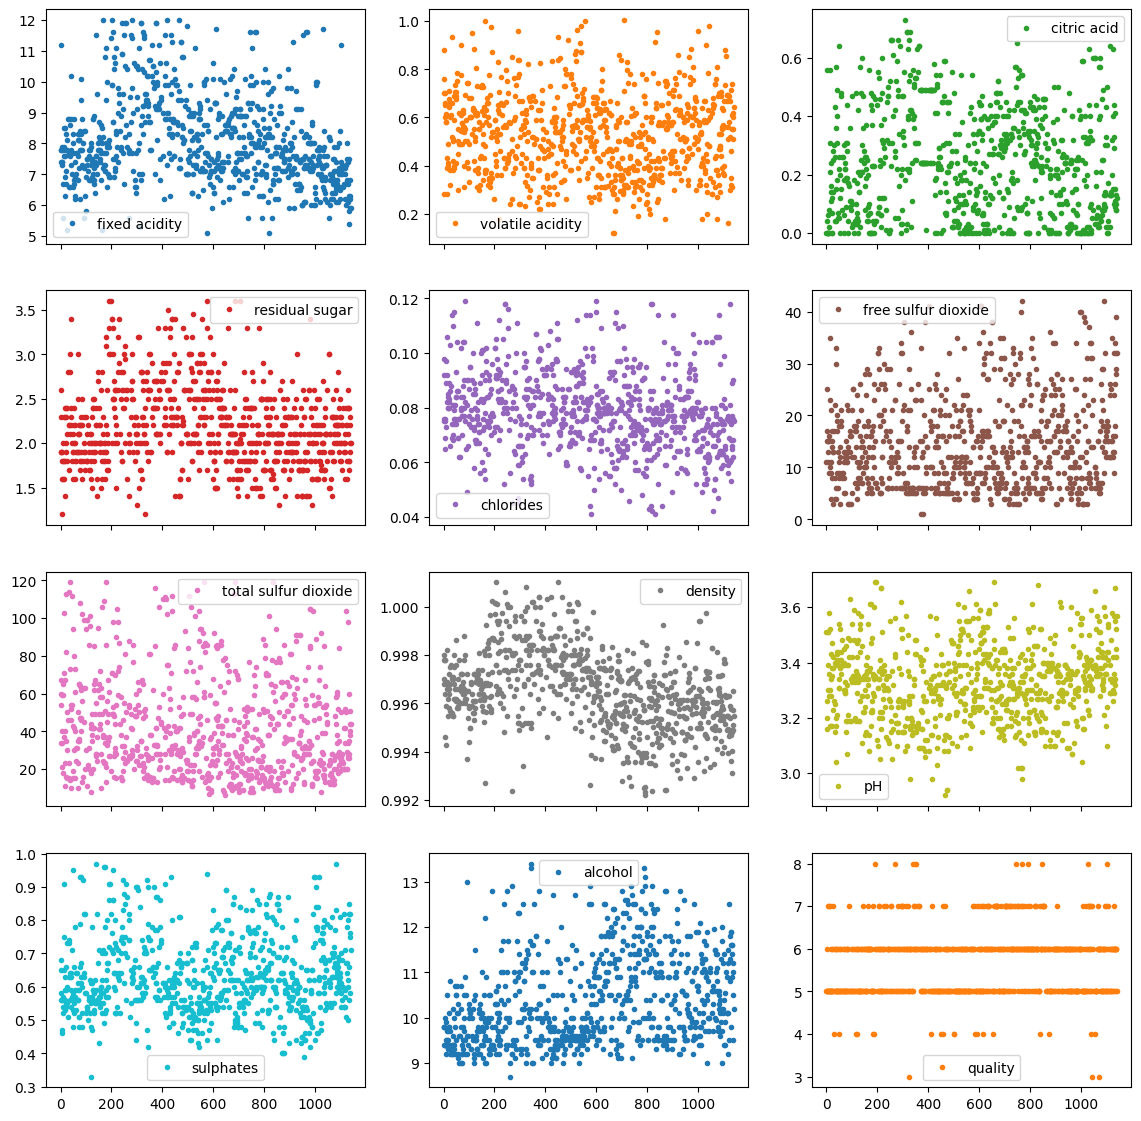

In [ ]:
# check each features distribution by scatter plot
df_iqr.plot(figsize=(14, 14), layout=(-1,3), subplots=True, marker='.', lw=0)

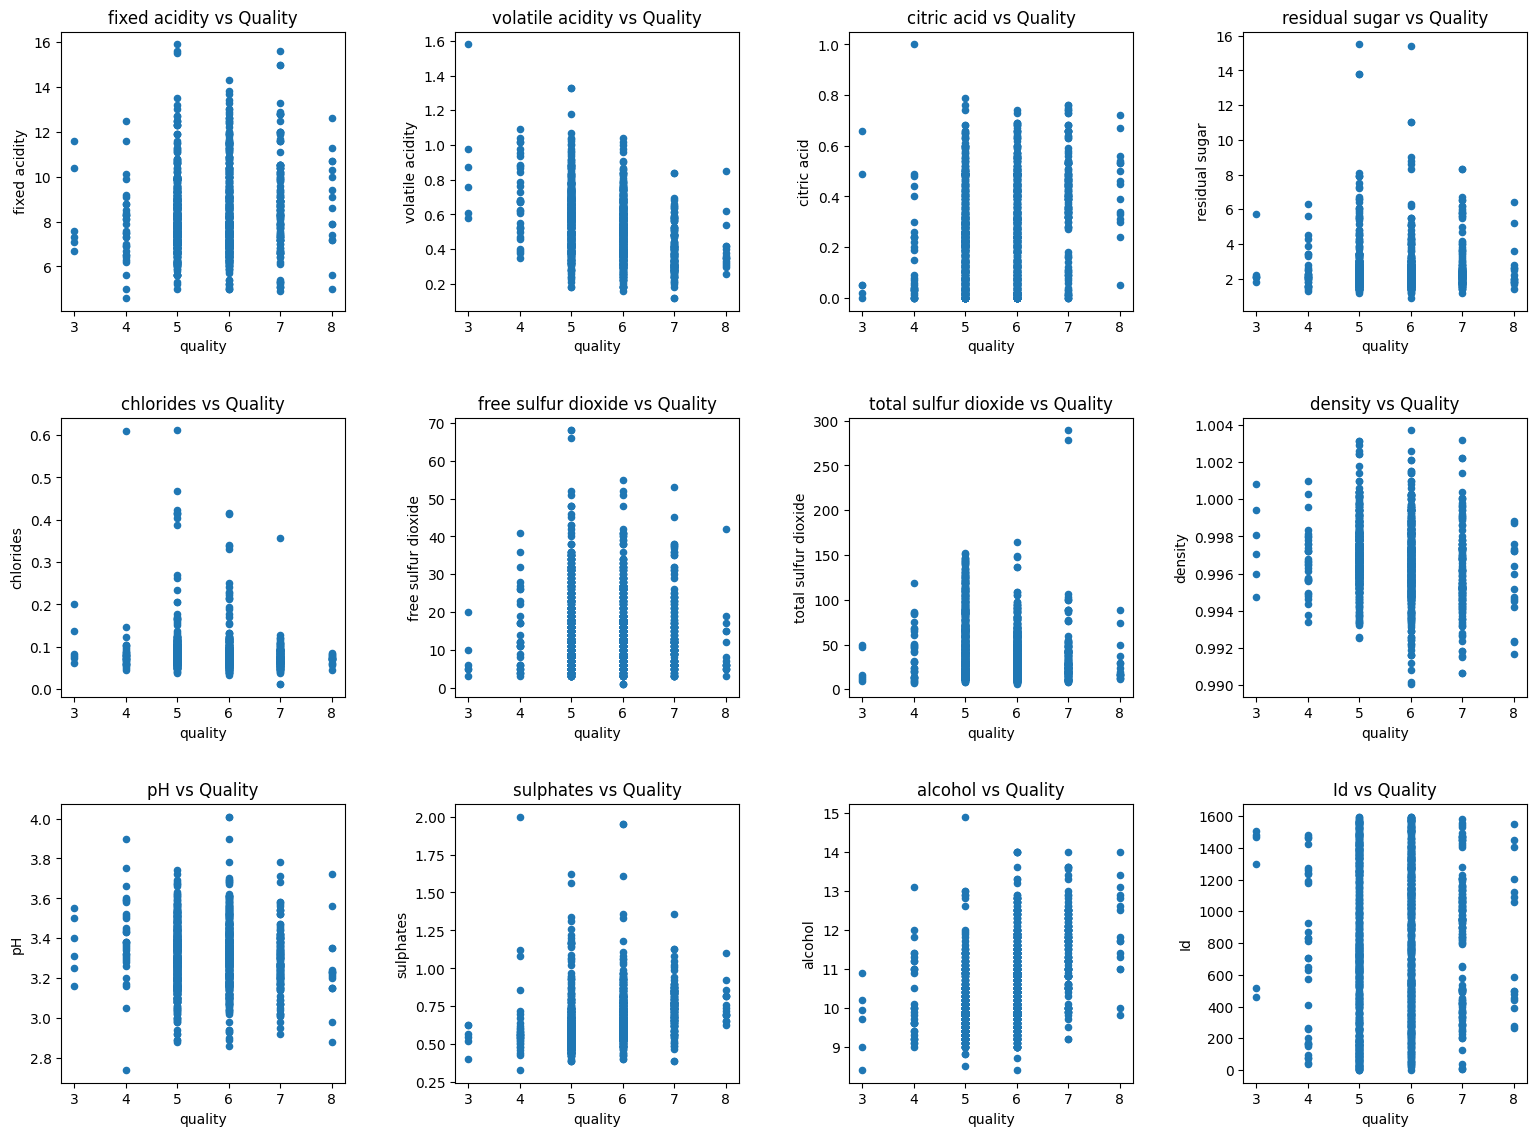

In [ ]:
# check each features distribution in different quality by scatter plot
import math

# remove 'quality' label from features
features = df.columns.drop('quality')
num_features = len(features)

# calculate rows and columns
cols = math.ceil(math.sqrt(num_features))
rows = math.ceil(num_features / cols)

# establish subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.ravel()

# scatter plots of each feature to `quality`
for i, col in enumerate(features):
    df.plot.scatter(y=col, x='quality', ax=axes[i], title=f"{col} vs Quality")

# hide excessive subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

## Coorelation between features and label(Quality)

<Axes: >

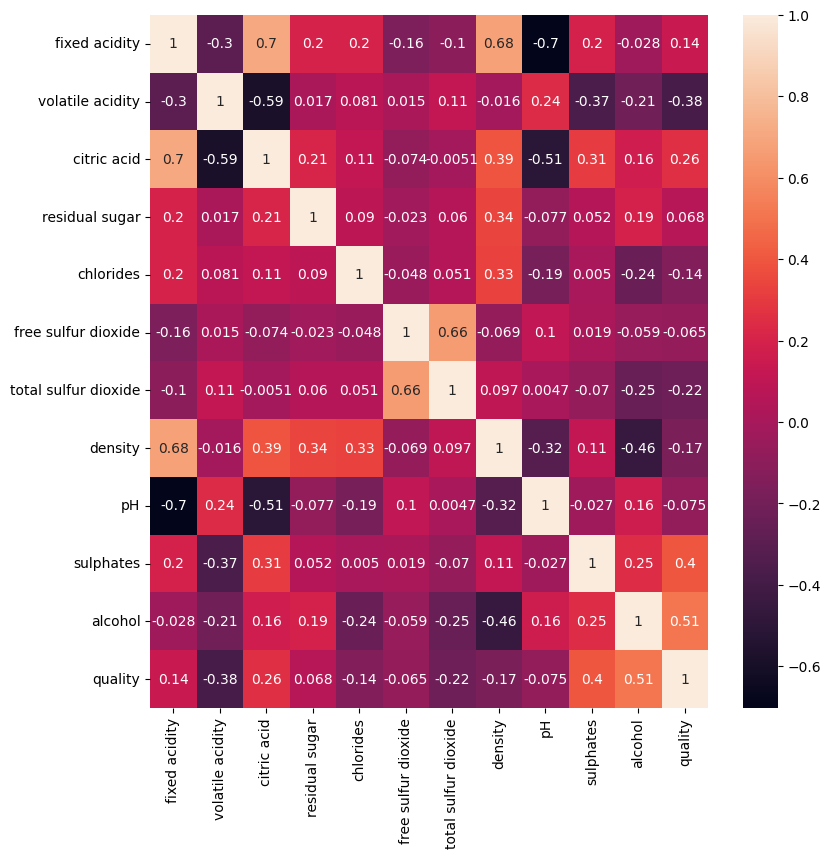

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(df_zs.corr(),annot=True)

## How features influence wine quality

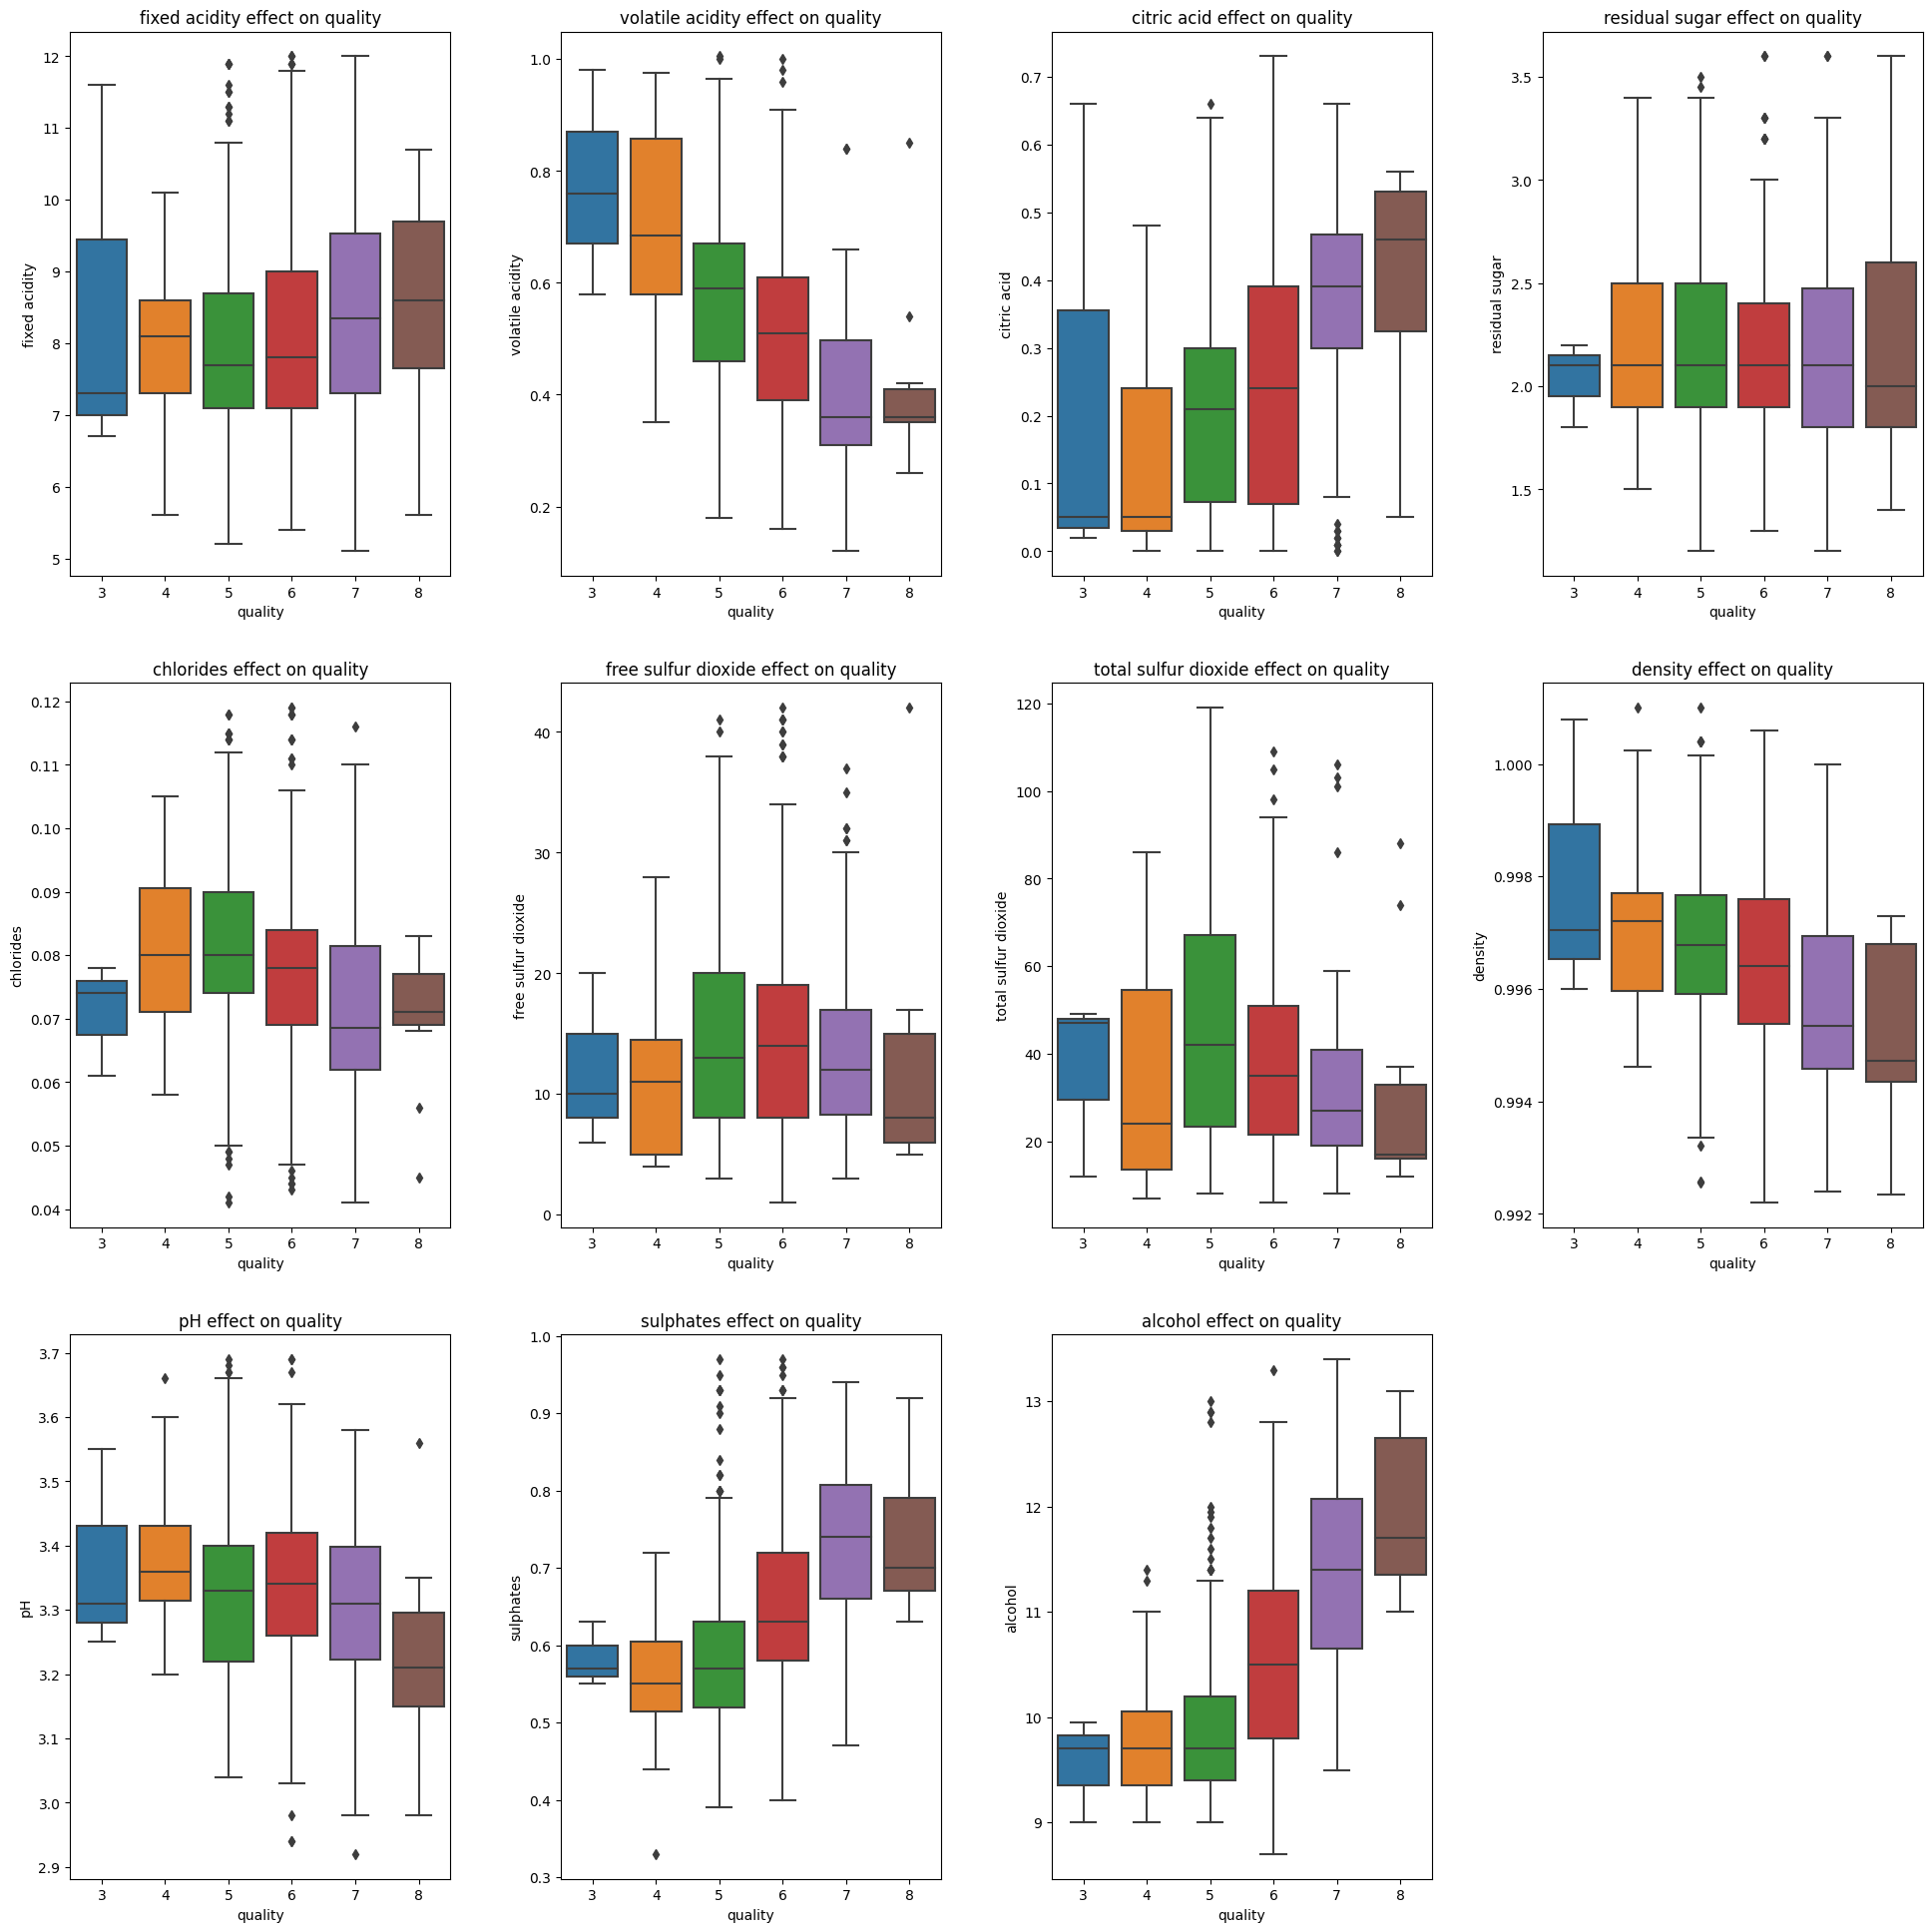

In [ ]:
def all_boxplot(dfc):
    fig, axes = plt.subplots(3,4,figsize=(20, 20))
    axes = axes.ravel()
    for i, col in enumerate([col for col in dfc.columns if col!='quality']):
        sns.boxplot(x=dfc['quality'], y=dfc[col], ax=axes[i])
        axes[i].set_title(f'{col} effect on quality')


        # 隱藏多餘的子圖
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(pad=3.0)
    plt.show()

all_boxplot(df_iqr)

# Model

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# random forest classifier
model_rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
model_rf.fit(train_X, train_y)

# prediction
pred_y = model_rf.predict(test_X)

# model evaluation
print("Classification Report:")
print(classification_report(test_y, pred_y))
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, pred_y))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.69      0.68      0.69        88
           6       0.65      0.74      0.69        89
           7       0.73      0.67      0.70        24
           8       0.00      0.00      0.00         1

    accuracy                           0.68       210
   macro avg       0.35      0.35      0.35       210
weighted avg       0.65      0.68      0.66       210


Confusion Matrix:
[[ 0  0  1  1  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 60 27  1  0]
 [ 0  0 18 66  5  0]
 [ 0  0  2  6 16  0]
 [ 0  0  0  1  0  0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.61904762 0.64670659 0.63473054 0.62874251 0.60479042]
Average CV score: 0.6268035357855718


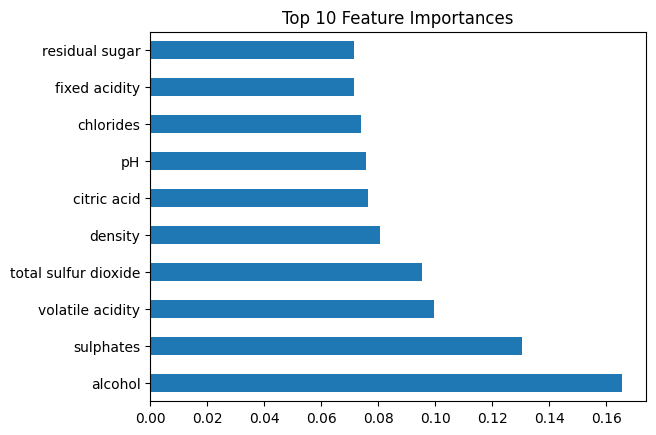

In [ ]:
from sklearn.model_selection import cross_val_score

# cross validation
cv_scores = cross_val_score(model_rf, train_X, train_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

import matplotlib.pyplot as plt
import pandas as pd

# feature importance
importances = model_rf.feature_importances_
feature_names = df.drop(['quality', 'Id'], axis=1).columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-validation Score: 0.6447390932420872


In [ ]:
# fetch the best model
best_model = grid_search.best_estimator_

# calculation the accuracy
train_score = best_model.score(train_X, train_y)
test_score = best_model.score(test_X, test_y)

print("Best Parameters:", grid_search.best_params_)
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Training Accuracy: 0.9473684210526315
Test Accuracy: 0.6714285714285714


In [ ]:
from sklearn.model_selection import cross_val_score

# cross validation for the best model
cv_scores = cross_val_score(best_model, train_X, train_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average Cross-validation score:", cv_scores.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.64285714 0.66467066 0.64670659 0.65868263 0.61077844]
Average Cross-validation score: 0.6447390932420872


# Conclusion

## Featrues that affect wine quality

Through the whole process, we can observe that there are a few wine features that affect wine quality.

In visualization, volatile acidity, citric acid, density, sulphates, alcohol shows the coorelation with wine quality.

In the feature importance of established model, the alcohol, sulphates, volatile acidity, total sulfur dioxide show the importance from high to low.

* alcohol: Related to flavor presenting of wine, normal range of alcohol content in wine is 12-14%
* sulphates: The additive to prevent oxidation, microbe growth, fortify wine flavor.
* volatile acid: Normally refers to short chain fatty acid, which are treated as flawness in wine.
* citric acid: One of the acid flovar source of wine, could be flavor enhancer in a proper content. Once an excessive malic-latic acid fermentation carried out by lactic acid bacteria in wine, it will lessen the citric acid content and further increase the content of volatile acid,causing adverse flavor of wine.

The analysis result aligns with normal industry common knowledge.
To make stronger precising power of model, except collecting more data,combining featrues to create new features will be a effective way to achieve higher score of model.

